# CNN deep network on mnist data
## Yuankai Huo @ Vandebrilt University  11/26/2016

In [1]:
import mnist_cnn as cnn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
print ("=== PACKAGES LOADED ===")

=== PACKAGES LOADED ===


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)
print ("=== MNIST READY ===")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
=== MNIST READY ===


## Specify how many epochs for training and design the graph 

In [3]:
training_epochs = 1
weights,biases = cnn.variable_init()
cost,optm,accr,sess,_corr = cnn.init_graph(weights,biases)

# PART 1: Classifier on original data

## 1.1 Visualize original training images

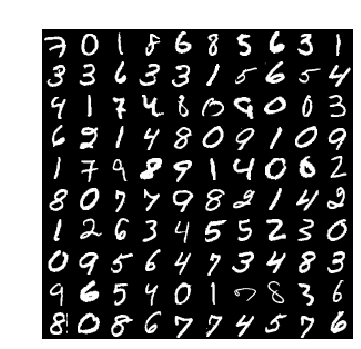

In [4]:
expriment1 = {'add_gaussian_noise':0 , 'add_label_noise':0}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment1)
cnn.show_trainimg(trainimg,sess,weights,biases)

## 1.2 Training the CNN deep network
### The CNN in this experiment is derived from my favorate tensorflow resource 
### https://github.com/sjchoi86/Tensorflow-101

In [5]:
training_epoch_full = 15
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epoch_full,cost,optm,accr,sess)

=== CNN TRAINING START ===
 Epoch: 000/015 cost: 0.727349369, Training accuracy: 0.980
 Epoch: 001/015 cost: 0.099692365, Training accuracy: 0.950
 Epoch: 002/015 cost: 0.065807977, Training accuracy: 0.960
 Epoch: 003/015 cost: 0.052077803, Training accuracy: 1.000
 Epoch: 004/015 cost: 0.042066752, Training accuracy: 1.000
 Epoch: 005/015 cost: 0.035584026, Training accuracy: 1.000
 Epoch: 006/015 cost: 0.029573827, Training accuracy: 1.000
 Epoch: 007/015 cost: 0.027720515, Training accuracy: 0.990
 Epoch: 008/015 cost: 0.024872596, Training accuracy: 1.000
 Epoch: 009/015 cost: 0.022039126, Training accuracy: 0.990
 Epoch: 010/015 cost: 0.018975729, Training accuracy: 1.000
 Epoch: 011/015 cost: 0.016136123, Training accuracy: 1.000
 Epoch: 012/015 cost: 0.015089065, Training accuracy: 0.970
 Epoch: 013/015 cost: 0.013377655, Training accuracy: 0.990
 Epoch: 014/015 cost: 0.011951796, Training accuracy: 0.990
=== CNN TRAINING FINISHED ===


## 1.3 Testing the CNN deep network

In [6]:
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

=== CNN TESTING START ===
 TEST ERROR RATE: 0.00840
=== CNN TESTING FINISHED ===


## 1.4 Q&A
### Q1: What is your test set error rate?
A1: The test set error rate for entire 10000 mnist is shown as following: 

In [7]:
print('test error rate is %.05f' % (1-test_acc))

test error rate is 0.00840


### Q2: What is the test set error rate for each class? Are some classes more challenging than others to distinguish from each other? Why?
A2: The test error rate for 10 classes (0 to 9), are shown below. Some classes are more challenging than others, such as "3", "7", "9". The reason is that those digits have similar appearance as other digits, e.g., "1" and "7" are confused, "4" and "9" are confused, "3" and "8" are confused etc.

In [8]:
test_acc_each_class = cnn.test_net_each_class(testimg,testlabel,sess,_corr)

=== CNN TESTING EACH CLASS START ===
 TEST ERROR RATE: 0.00408 FOR CLASS DIGIT 0 [size=980]
 TEST ERROR RATE: 0.00264 FOR CLASS DIGIT 1 [size=1135]
 TEST ERROR RATE: 0.00194 FOR CLASS DIGIT 2 [size=1032]
 TEST ERROR RATE: 0.00297 FOR CLASS DIGIT 3 [size=1010]
 TEST ERROR RATE: 0.00204 FOR CLASS DIGIT 4 [size=982]
 TEST ERROR RATE: 0.01570 FOR CLASS DIGIT 5 [size=892]
 TEST ERROR RATE: 0.01148 FOR CLASS DIGIT 6 [size=958]
 TEST ERROR RATE: 0.01848 FOR CLASS DIGIT 7 [size=1028]
 TEST ERROR RATE: 0.00513 FOR CLASS DIGIT 8 [size=974]
 TEST ERROR RATE: 0.02081 FOR CLASS DIGIT 9 [size=1009]
=== CNN TESTING EACH CLASS FINISHED ===


### Q3: Based only on information gathered in the first epoch of training, do you think that the model would benefit from more training time? Why?
A3: In this CNN network, the model would benefit from more training time based on the first epoch. The reason is that once you check the average cost, which is cross entropy of SoftMax function, the cost can be further optimized. The results can tell us the test error rate decreases largely (using only 1 epoch as following result) comparing with the results in 1.3 (using 15 epochs).

In [9]:
# if only use 1 epoch
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

=== CNN TRAINING START ===
 Epoch: 000/001 cost: 0.610642908, Training accuracy: 0.990
=== CNN TRAINING FINISHED ===
=== CNN TESTING START ===
 TEST ERROR RATE: 0.03850
=== CNN TESTING FINISHED ===


### Q4: Besides training for a longer time, what would you do to improve accuracy?
A4: Many ways can be used to improve the performance (my discussion is not limited on the mnist since the accuracy is already 99.2%). In generally, we can (1) rescale/normalize the data, (2) preprocess the data using PCA, (3) perform pa4rameter tuning if using the same CNN, (4) try other deep networks, (5) even combine with other machine learning methods if y some interesting features can be founded using "human intelligence".

# PART 2: Added image noise

## 2.1 Add guassian noise with mu=0, std=8

--- Add gaussian noise mu=0 std=8 ---


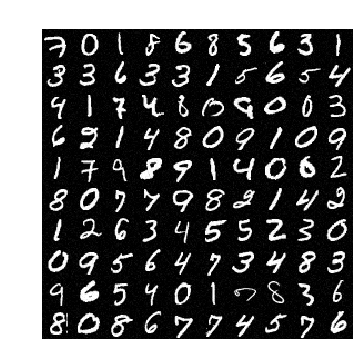

In [ ]:
expriment2 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':8}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment2)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [ ]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)
print('test error rate is %.05f' % (1-test_acc))

=== CNN TRAINING START ===


## 2.2 Add guassian noise with mu=0, std=32

In [ ]:
expriment3 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':32}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment3)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [ ]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)
print('test error rate is %.05f' % (1-test_acc))

## 2.3 Add guassian noise with mu=0, std=128

In [ ]:
expriment4 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':128}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment4)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [ ]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

## 2.4 Q&A

### Q1: What are the implications of the dependence of accuracy on noise if you were to deploy a production classifier? How much noise do you think a production classifier could tolerate?
A1: Typically, the larger the noise leads to the worse accuracy. In this CNN, we can see such trend in the following image. From the error rate plot, if we use 1 epoch, the noise standard deviation <= 108 is tolerable (test error rate < 0.1). If we use 15 epochs, the noise standard deviation <= 336 is tolerable (test error rate < 0.1). Notice that we clip the images between 0 and 255 when adding the noise!

In [ ]:
noise_result = np.loadtxt('expr_results_noise.txt', delimiter=',')
gaussian_noise = noise_result[0]
label_noise_error_1 = noise_result[1]
label_noise_error_15 = noise_result[2]
plt.plot(gaussian_noise, label_noise_error_1, 'k')
plt.plot(gaussian_noise, label_noise_error_1,'ro', label = '1 training epoch')
plt.plot(gaussian_noise, label_noise_error_15, 'b')
plt.plot(gaussian_noise, label_noise_error_15, 'go', label = '15 training epochs')
plt.xlabel('standard deviation of Gaussian noise')
plt.ylabel('error rate')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### Q2:Do you think that Gaussian noise is an appropriate model for real-world noise if the characters were acquired by standard digital photography? If so, in what situations? How would you compensate for it? 
A2: Gaussian noise is not sufficient in the real world digital photography. For instance, thinking about the situation that the photos are taken by digital camera. The Gaussian noise can simulate the random noise. However, we still need to simulate the fixed pattern noise (long exposure), banding noise (from camera hardware), motion noise (hand movement) etc. In those cases, kernel based smooth, low pass filter and motion correction preprocessing should be employed.

### Q3: Is the accuracy of certain classes affected more by image noise than others? Why?
A3: Yes, from the following results, we can see when std is 128 several classes are affected more.

In [ ]:
test_acc_each_class = cnn.test_net_each_class(testimg,testlabel,sess,_corr)

# Part 3: Label noise

## 3.1 Apply 5% randomize on training labels

In [ ]:
expriment5 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.05}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment5)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

## 3.2 Apply 15% randomize on training labels

In [ ]:
expriment6 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.15}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment6)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

## 3.3 Apply 50% randomize on training labels

In [ ]:
expriment7 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.5}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment7)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

## 3.4 Q&A

### Q1. How important are accurate training labels to classifier accuracy?
A1. The following figure indicates the accurate training labels are important if the randomize > 60%.

In [ ]:
random_label_result = np.loadtxt('expr_results_label.txt', delimiter=',')
random_label_rate = random_label_result[0]
random_label_error_1 = random_label_result[1]
random_label_error_15 = random_label_result[2]
plt.plot(random_label_rate, random_label_error_1, 'k')
plt.plot(random_label_rate, random_label_error_1,'ro', label = '1 training epoch')
plt.plot(random_label_rate, random_label_error_15, 'b')
plt.plot(random_label_rate, random_label_error_15, 'go', label = '15 training epochs')
plt.xlabel('percentage of randomize of training labels')
plt.ylabel('error rate')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### Q2. How would you compensate for label noise? Assume you have a large budget available but you want to use it as efficiently as possible.
A2. We can (1) randomly visually check 1000 images and see the error rate. If the label noise is not horrible (e.g., < 50% in this case), (2) do the automated classification using 10 fold cross validation and (3) then update the label. Then repeat (1)(2)(3) until we get satisfied results. If the label noise is horrible, then we have to hire a person to relabel certain amount of labels.

### Q3. How would you quantify the amount of label noise if you had a noisy data set?
A3. For the label noise, I will randomly check 1000 images visually. Then I will calculate the label noise rate based on the sample and use this to quantify the label noise for entire dataset.

### Q4.  If your real-world data had both image noise and label noise, which would you be more concerned about? Which is easier to compensate for?
A4. For medical image data, I would more concern about image noise because the quality/contrast is one of the most challenging limitations for automatic image processing algorithms. For the label noise, it is easier to compensate if you have enough human/computing resources.